In [31]:
import wave
import matplotlib.pyplot as plt
import crypto

In [2]:
file=wave.open('sig100.wav')

In [3]:
#no of channels in the file
#channel=no of sources from which the audio comes from- mono= from a single input
#stereo= from 2 sources (equivalent to sound from left and right headphones)
print("The no of channels is:",file.getnchannels())

The no of channels is: 2


In [4]:
#Frequency of the sample
#this gives the no of frames per second
s_rate=file.getframerate()
print("Sampling frequency",s_rate)

Sampling frequency 360


In [5]:
#no of bytes in every sample
print("No of bytes in a sample:",file.getsampwidth())

No of bytes in a sample: 2


In [6]:
#to find the total number of frames in the sample
n_frames=file.getnframes()
print(n_frames)

650000


In [7]:
#to read frames of the wave file
data=file.readframes(-1) # to read n frames
print(data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [8]:
#The above o/p shows binary data
#There are 2 channels, and 2 bytes per channel= 4 bytes in all in a frame
#First two bytes= from 1st channel, next 2 bytes= from the next channel

In [9]:
#To decode the binary data
import numpy as np
op=np.frombuffer(data,np.int16)
print(op)



[ -928  -416  -928 ... -2144 -8192     0]


In [10]:
op.shape=-1,2
#-1 stands for all the rows, 2 for the number of columnns
print(op)


[[ -928  -416]
 [ -928  -416]
 [ -928  -416]
 ...
 [-4320 -2336]
 [-4896 -2144]
 [-8192     0]]


In [11]:
#in the above o/p, the first column= from the first channel
#second column= from the second column


In [12]:
#taking the transpose, so that each row= from one channel
op=op.T
#print(op)
#new_op=(op[0:30])
#print(new_op)
temp1=op[0]
temp2=op[1]
temp1_sign=[]
temp1_mod=[]
#print(temp1)
print(len(temp1))
print(len(temp2))

650000
650000


In [13]:
#to make the time sequence
#1. Find the total duration of the file
#duration= n_frames/sampling_rate (sampling rate= no of samples per sec )
duration=n_frames/s_rate
print(duration)

#time difference between each sample
diff=1/s_rate

1805.5555555555557


In [14]:
#to generate a time sequence
t_seq=np.arange(0,duration,diff)
#the arrange function's params are initial and final val, and the step val
print(len(t_seq))

650000


Text(0, 0.5, 'Amplitude')

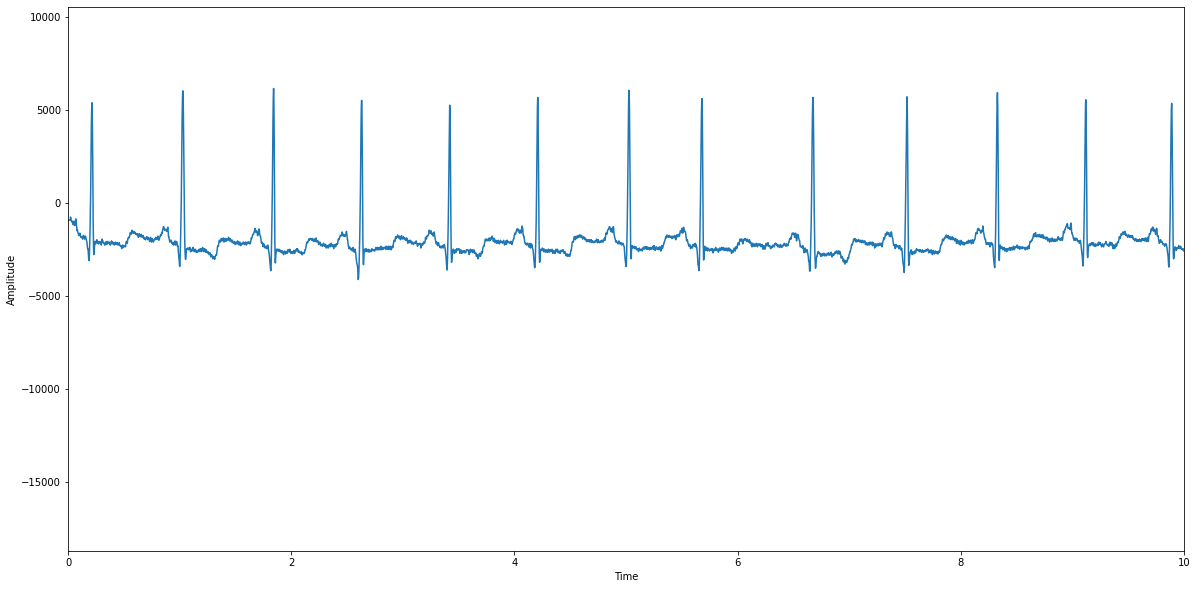

In [15]:
#to plot the first channel
plt.figure(figsize=(20,10))
plt.xlim(0,10)
plt.plot(t_seq,op[0])
plt.xlabel("Time")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Amplitude')

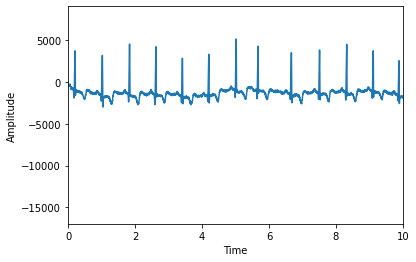

In [16]:
#to plot the second channel
plt.plot(t_seq,op[1])
plt.xlim(0,10)
plt.xlabel("Time")
plt.ylabel("Amplitude")

In [29]:
import math
new_op1=[]   
new_op2=[]
def gcd(a, h):
    temp = 0
    while(1):
        temp = a % h
        if (temp == 0):
            return h
        a = h
        h = temp
  
  
p = 3
q = 7
n = p*q
e = 2
phi = (p-1)*(q-1)
  
while (e < phi):
  
    # e must be co-prime to phi and smaller than phi.
    if(gcd(e, phi) == 1):
        break
    else:
        e = e+1
  
# Private key (d stands for decrypt)
# choosing d such that it satisfies
# d*e = 1 + k * quotient
  
k = 2
d = (1 + (k*phi))/e

for i in temp1:
    c = pow(i, e)
    c = math.fmod(c, n)
    #print(c)
    new_op1.append(c)
    
    
for i in temp2:
    c = pow(i, e)
    c = math.fmod(c, n)
    #print(c)
    new_op2.append(c)
print(new_op1[:100])

[-6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, 0.0, 0.0, -6.0, 1.0, 0.0, -20.0, 0.0, -17.0, 0.0, 2.0, -1.0, -20.0, -17.0, 0.0, 1.0, 0.0, -20.0, 0.0, -20.0, 1.0, 5.0, 13.0, 6.0, 9.0, -1.0, 0.0, -4.0, -4.0, -4.0, -11.0, 16.0, -11.0, -4.0, -1.0, -1.0, -1.0, -1.0, -8.0, -1.0, 18.0, -8.0, -4.0, -4.0, 0.0, -8.0, 18.0, -1.0, 0.0, 0.0, -1.0, 0.0, -0.0, 0.0, -18.0, 0.0, -16.0, -16.0, -13.0, -2.0, 20.0, 20.0, 13.0, -1.0, 0.0, 1.0, 0.0, -11.0, 0.0, 0.0, 0.0, -14.0, 0.0, 1.0, -3.0, 4.0, -5.0, 13.0, -1.0, -1.0, 0.0, -18.0, 1.0, -1.0, 0.0, -0.0, 1.0, 0.0, -18.0, 0.0, 0.0, 1.0, -18.0]


In [18]:
print(op[0])
print(temp1)
print(new_op1[0:100])

[ -928  -928  -928 ... -4320 -4896 -8192]
[ -928  -928  -928 ... -4320 -4896 -8192]
[-6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, 0.0, 0.0, -6.0, 1.0, 0.0, -20.0, 0.0, -17.0, 0.0, 2.0, -1.0, -20.0, -17.0, 0.0, 1.0, 0.0, -20.0, 0.0, -20.0, 1.0, 5.0, 13.0, 6.0, 9.0, -1.0, 0.0, -4.0, -4.0, -4.0, -11.0, 16.0, -11.0, -4.0, -1.0, -1.0, -1.0, -1.0, -8.0, -1.0, 18.0, -8.0, -4.0, -4.0, 0.0, -8.0, 18.0, -1.0, 0.0, 0.0, -1.0, 0.0, -0.0, 0.0, -18.0, 0.0, -16.0, -16.0, -13.0, -2.0, 20.0, 20.0, 13.0, -1.0, 0.0, 1.0, 0.0, -11.0, 0.0, 0.0, 0.0, -14.0, 0.0, 1.0, -3.0, 4.0, -5.0, 13.0, -1.0, -1.0, 0.0, -18.0, 1.0, -1.0, 0.0, -0.0, 1.0, 0.0, -18.0, 0.0, 0.0, 1.0, -18.0]


Text(0, 0.5, 'Amplitude')

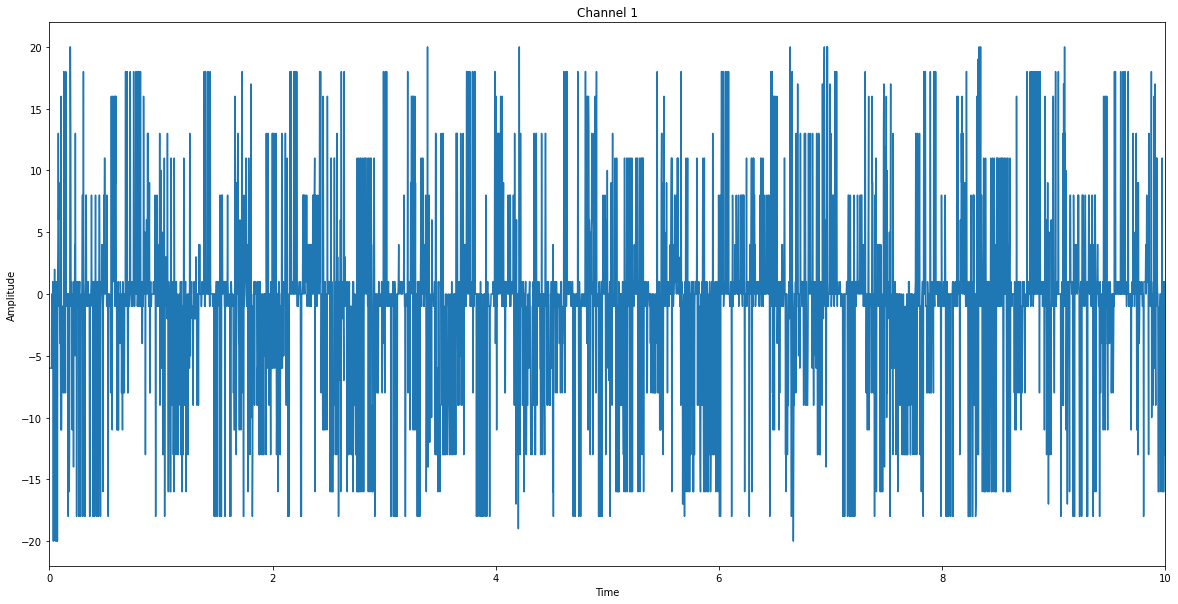

In [19]:
#to plot the encrypted waveform- channel1
plt.figure(figsize=(20,10))
plt.xlim(0,10)
plt.plot(t_seq,new_op1)
plt.title("Channel 1")
plt.xlabel("Time")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Amplitude')

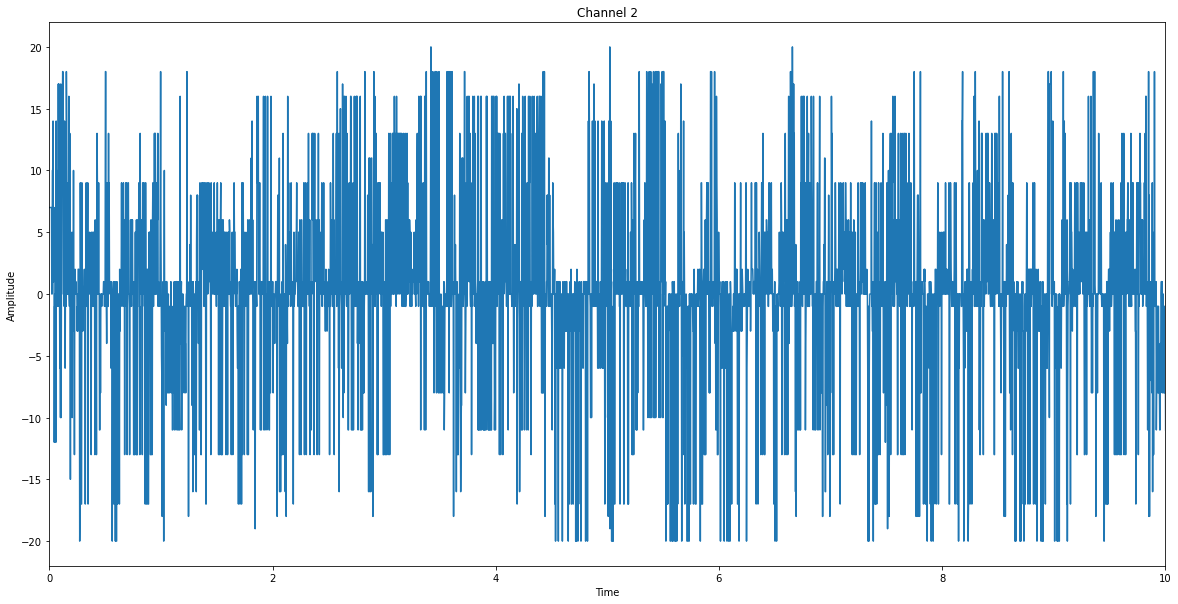

In [20]:
#to plot the encrypted waveform- channel2
plt.figure(figsize=(20,10))
plt.xlim(0,10)
plt.plot(t_seq,new_op2)
plt.title("Channel 2")
plt.xlabel("Time")
plt.ylabel("Amplitude")

In [4]:
plt.figure(figsize=(40,10))


plt.subplot(4,1,1)
plt.xlim(0,10)
plt.plot(t_seq,op[0])
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Original Channel 1")


plt.subplot(4,1,2)
plt.xlim(0,10)
plt.plot(t_seq,op[1])
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Original Channel 2")


plt.subplot(4,1,3)
plt.xlim(0,10)
plt.plot(t_seq,new_op1)
plt.title("Encrypted Channel 1")
plt.xlabel("Time")
plt.ylabel("Amplitude")


plt.subplot(4,1,4)
plt.xlim(0,10)
plt.plot(t_seq,new_op2)
plt.title("Encrypted Channel 2")
plt.xlabel("Time")
plt.ylabel("Amplitude")

NameError: name 'plt' is not defined

In [34]:
#decryption
print("n is",n)
print("d is",d)
d1=[]
d2=[]

for i in new_op1:
    m = pow(i, d)
    m = math.fmod(m, n)
    d1.append(m)
print(new_op1[:100])
print()
print(d1[:100])
    
'''for i in new_op2:
    m = pow(i, d)
    m = math.fmod(m, n)
    d2.append(m)'''

n is 21
d is 5.0
[-6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, 0.0, 0.0, -6.0, 1.0, 0.0, -20.0, 0.0, -17.0, 0.0, 2.0, -1.0, -20.0, -17.0, 0.0, 1.0, 0.0, -20.0, 0.0, -20.0, 1.0, 5.0, 13.0, 6.0, 9.0, -1.0, 0.0, -4.0, -4.0, -4.0, -11.0, 16.0, -11.0, -4.0, -1.0, -1.0, -1.0, -1.0, -8.0, -1.0, 18.0, -8.0, -4.0, -4.0, 0.0, -8.0, 18.0, -1.0, 0.0, 0.0, -1.0, 0.0, -0.0, 0.0, -18.0, 0.0, -16.0, -16.0, -13.0, -2.0, 20.0, 20.0, 13.0, -1.0, 0.0, 1.0, 0.0, -11.0, 0.0, 0.0, 0.0, -14.0, 0.0, 1.0, -3.0, 4.0, -5.0, 13.0, -1.0, -1.0, 0.0, -18.0, 1.0, -1.0, 0.0, -0.0, 1.0, 0.0, -18.0, 0.0, 0.0, 1.0, -18.0]

[-6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, 0.0, 0.0, -6.0, 1.0, 0.0, -20.0, 0.0, -5.0, 0.0, 11.0, -1.0, -20.0, -5.0, 0.0, 1.0, 0.0, -20.0, 0.0, -20.0, 1.0, 17.0, 13.0, 6.0, 18.0, -1.0, 0.0, -16.0, -16.0, -16.0, -2.0, 4.0, -2.0, -16.0, -1.0, -1.0, -1.0, -1.0, -8.0, -1.0, 9.0, -8.0, -16.0, -16.0, 0.0, -8.0, 9.0, -1.0, 0.0, 0.0, -1.0, 0.0, -0.0, 0.0, -9.0, 0.0, -4.0, -4.0, -13.0, -11.0, 20.0, 20.0

'for i in new_op2:\n    m = pow(i, d)\n    m = math.fmod(m, n)\n    d2.append(m)'

Text(0, 0.5, 'Amplitude')

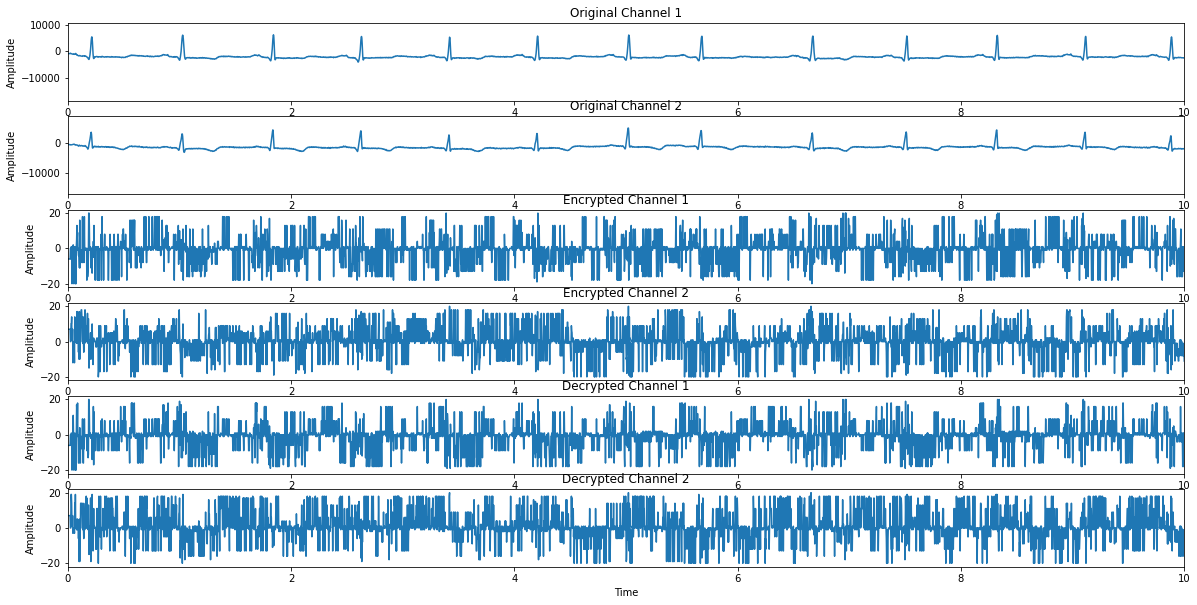

In [23]:
plt.figure(figsize=(20,10))


plt.subplot(6,1,1)
plt.xlim(0,10)
plt.plot(t_seq,op[0])
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Original Channel 1")


plt.subplot(6,1,2)
plt.xlim(0,10)
plt.plot(t_seq,op[1])
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Original Channel 2")


plt.subplot(6,1,3)
plt.xlim(0,10)
plt.plot(t_seq,new_op1)
plt.title("Encrypted Channel 1")
plt.xlabel("Time")
plt.ylabel("Amplitude")


plt.subplot(6,1,4)
plt.xlim(0,10)
plt.plot(t_seq,new_op2)
plt.title("Encrypted Channel 2")
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.subplot(6,1,5)
plt.xlim(0,10)
plt.plot(t_seq,d1)
plt.title("Decrypted Channel 1")
plt.xlabel("Time")
plt.ylabel("Amplitude")


plt.subplot(6,1,6)
plt.xlim(0,10)
plt.plot(t_seq,d2)
plt.title("Decrypted Channel 2")
plt.xlabel("Time")
plt.ylabel("Amplitude")

In [3]:
import crypto
from crypto.PublicKey import RSA
from crypto import Random
random_generator = Random.new().read
key = RSA.generate(1024, random_generator) 


ModuleNotFoundError: No module named 'crypto.PublicKey'